In [65]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
df2= pd.read_csv('test.csv')
df1= pd.read_csv('train.csv')

In [10]:
df1.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [34]:
df2.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [35]:
df1.shape

(1460, 81)

In [36]:
df2.shape

(1459, 80)

In [66]:
## We have two datasets that we need to concatenate into one single dataset
df = pd.concat([df1,df2],axis=0)


In [39]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0


In [40]:
df.shape

(2919, 81)

In [67]:
## Cleaning of data
#drop duplicate
df.drop_duplicates(inplace=True)

In [24]:
df.shape  ###It means there are no duplicates

(2919, 81)

In [25]:
##Check for missing values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [68]:
## fill in the SalesPrice missing values with mean
mean= df['SalePrice'].mean()
df['SalePrice'].fillna(mean,inplace=True)
df.shape

(2919, 81)

In [28]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [69]:
## Replace all the remaining missing values with zero
df.fillna(0,inplace=True)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500.0


In [85]:
df.shape

(2919, 81)

In [86]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,57.766701,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,33.481636,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,56174.332503
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,43.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,163000.000000
50%,1460.000000,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,180921.195890
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,180921.195890
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [70]:
## from dataset we see that the LotARea seems to have the outliers and we need to handle them
#we need to plot the box plot to visualize it
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: ylabel='LotArea'>

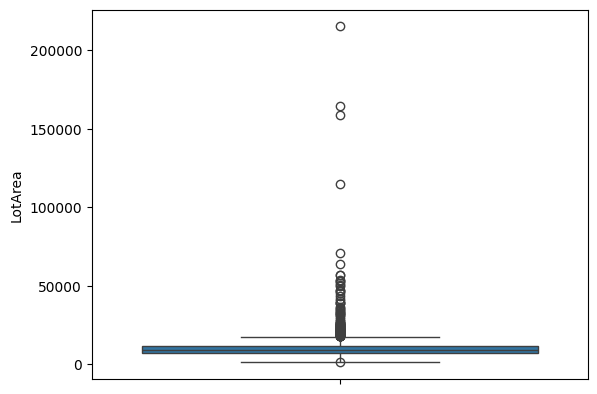

In [90]:
sns.boxplot(df,y='LotArea')

In [ ]:
## Handle the outliers using the InterQuartile RAnge

In [71]:
## From describe we can see Q1 and Q3
Q1=7478
Q3=11570
IQR= Q3 -Q1
lower=Q1 - 1.5*IQR
upper=Q3+ 1.5*IQR
print(lower)
print(upper)


1340.0
17708.0


In [72]:
## all upper outlier gave them 0
df['LotArea']= df['LotArea'].apply(lambda x: x if x<upper else 0) 

In [73]:
## all lower outlier gave them 0
df['LotArea']= df['LotArea'].apply(lambda x: x if x>lower else 0) 

In [74]:
## Removed all outliers
df= df[df['LotArea'] != 0] 

In [75]:
df.shape 

(2791, 81)

<Axes: ylabel='LotArea'>

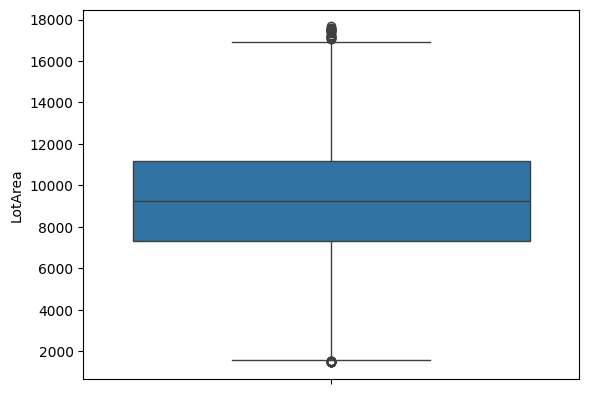

In [148]:
## Boxplot after removing the outlier
sns.boxplot(df,y='LotArea')

In [150]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500.0


In [76]:
## Convert the categorical values to numerical,Machine learning only use the numerical values
#First we get the list of all the columns that are object
col_cat=df.select_dtypes('object').columns.to_list()

In [77]:
print(col_cat)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [78]:
## We use onehotencoder to get the numerical( the code automatically removes all catecorical values)
pd.get_dummies(df,columns=col_cat)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,21.0,1526,4,5,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


In [79]:
df=pd.get_dummies(df,columns=col_cat)
df.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False


In [80]:
df = df.astype('int')

In [83]:
df.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,196,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,162,486,...,0,0,0,1,0,0,0,0,1,0


In [181]:
df.shape

(2791, 305)

In [85]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453    180921
1454    180921
1455    180921
1457    180921
1458    180921
Name: SalePrice, Length: 2791, dtype: int64

In [89]:
## Independent and dependent variable
X = df.drop(columns='SalePrice')
Y = df['SalePrice']

In [126]:
## Bring all columns into one standard scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [127]:
X[:]= scaler.transform(X)

In [128]:
X

array([[0.00000000e+00, 2.35294118e-01, 3.57142857e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.42700630e-04, 0.00000000e+00, 4.39560440e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.85401261e-04, 2.35294118e-01, 3.73626374e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.98971900e-01, 8.23529412e-01, 1.15384615e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99657299e-01, 3.82352941e-01, 3.40659341e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.35294118e-01, 4.06593407e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]],
      shape=(2791, 304))

In [95]:
## We need to divide data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [96]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2232, 304), (559, 304), (2232,), (559,))

In [99]:
##Create a Linear Reggression Model
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [100]:
Y_pred = model.predict(X_test)

In [104]:
##Original values
Y_test[:5]

1428    180921
904     180921
615     180921
1104    180921
756     180921
Name: SalePrice, dtype: int64

In [105]:
## Predicted Values
Y_pred[:5]

array([120632.26665301, 192507.45846109, 165863.33015925, 151880.46157225,
       195196.49669536])

In [109]:
##Mean absolute error
from sklearn.metrics import mean_absolute_error

In [108]:
mean_absolute_error(Y_test,Y_pred)

30834.656373477672

In [119]:
### Perfom Lasso Regression to reduce the mean_squred error
from sklearn.linear_model import Lasso 
Lasso_model= Lasso(alpha=50, max_iter=100,tol=0.1)
Lasso_model.fit(X_train,Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
Lasso_pred= Lasso_model.predict(X_test)

In [112]:
mean_absolute_error(Y_test,Lasso_pred)

29251.10475007534

In [115]:
### Perfom Ridge Regression to reduce the mean_squred error
from sklearn.linear_model import Ridge 
Ridge_model= Ridge(alpha=50, max_iter=100,tol=0.1)
Ridge_model.fit(X_train,Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [116]:
Ridge_pred= Lasso_model.predict(X_test)

In [117]:
mean_absolute_error(Y_test,Ridge_pred)

29251.10475007534